In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from xml.etree import ElementTree
%matplotlib inline

In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
pwd

'/content'

In [4]:
ls

drive/  sample_data/


In [5]:
cd /content/drive/MyDrive/RDD2020

/content/drive/MyDrive/RDD2020


In [6]:
import urllib.request
import os

urllib.request.urlretrieve(
    'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz',
    'train.tar.gz')

os.listdir()

['train.tar.gz', 'data']

In [7]:
!tar -zxf /content/drive/MyDrive/RDD2020/train.tar.gz

In [8]:
ls

data/  train/  train.tar.gz


In [9]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

base_path = os.getcwd() + '/train/'

classes=["D00", "D10", "D20", "D40", "D44"]

# country corresponds to municipality name.
countries = ["Czech", "India", "Japan"]

In [10]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for img in countries:
    
    file_list = [filename for filename in os.listdir(base_path + img + '/annotations/xmls/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + img + '/annotations/xmls/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：21041
# of labels：34702


In [11]:
Czech = base_path + 'Czech' + '/images/'
India = base_path + 'India' + '/images/'
Japan = base_path + 'Japan' + '/images/'

print('total training Czech images:', len(os.listdir(Czech)))
print('total training India images:', len(os.listdir(India)))
print('total training Japan images:', len(os.listdir(Japan)))

Czech_images = os.listdir(Czech)
print(Czech_images[:10])

India_images = os.listdir(India)
print(India_images[:10])

Japan_images = os.listdir(Japan)
print(Japan_images[:10])

total training Czech images: 2829
total training India images: 7706
total training Japan images: 10506
['Czech_000982.jpg', 'Czech_003323.jpg', 'Czech_001359.jpg', 'Czech_002850.jpg', 'Czech_002553.jpg', 'Czech_002404.jpg', 'Czech_001042.jpg', 'Czech_000031.jpg', 'Czech_001918.jpg', 'Czech_003478.jpg']
['India_008558.jpg', 'India_004392.jpg', 'India_001104.jpg', 'India_000847.jpg', 'India_007836.jpg', 'India_003174.jpg', 'India_005911.jpg', 'India_009691.jpg', 'India_008229.jpg', 'India_002505.jpg']
['Japan_008628.jpg', 'Japan_008170.jpg', 'Japan_009147.jpg', 'Japan_004484.jpg', 'Japan_006829.jpg', 'Japan_009144.jpg', 'Japan_000207.jpg', 'Japan_006487.jpg', 'Japan_012894.jpg', 'Japan_003587.jpg']


Count for each classes
D00 : 6592
D10 : 4446
D20 : 8381
D40 : 5627
D44 : 5057


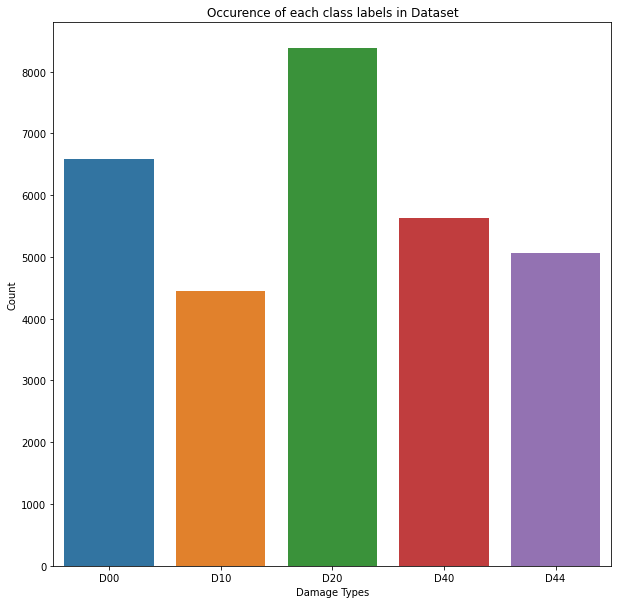

In [12]:
#number of each class labels
count_dict = collections.Counter(cls_names)
cls_count = []

print('Count for each classes')
for c in classes:
    cls_count.append(count_dict[c])
    print(f'{c} : {count_dict[c]}')
    
fig = plt.figure(figsize = (10, 10)) 
sns.barplot(x = classes, y = cls_count)  
plt.xlabel("Damage Types") 
plt.ylabel("Count") 
plt.title("Occurence of each class labels in Dataset") 
plt.show()

In [13]:
# data analysis

count = []
cont = []
category = []   #counting total # images, D00, D10, D20, D40, D44 # of labels

for country in countries:
    cont.extend([country]*7)
    category.extend(['# of images', 'D00', 'D10', 'D20', 'D40', 'D44', '# of labels'])
    
    files = [filename for filename in os.listdir(base_path + country + '/annotations/xmls')]
    count.append(len(files))
    label_counts = [0,0,0,0,0]
    for i in files:
        infile_xml = open(base_path + country + '/annotations/xmls/' +i)
        tree = ElementTree.parse(infile_xml)
        root = tree.getroot()
        if root.find('object'):
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                if cls_name == 'D00':
                    label_counts[0] += 1
                elif cls_name == 'D10':
                    label_counts[1] += 1
                elif cls_name == 'D20':
                    label_counts[2] += 1
                elif cls_name == 'D40':
                    label_counts[3] += 1
                elif cls_name == 'D44':
                    label_counts[4] += 1
            
    count.extend(label_counts)
    count.append(sum(label_counts))

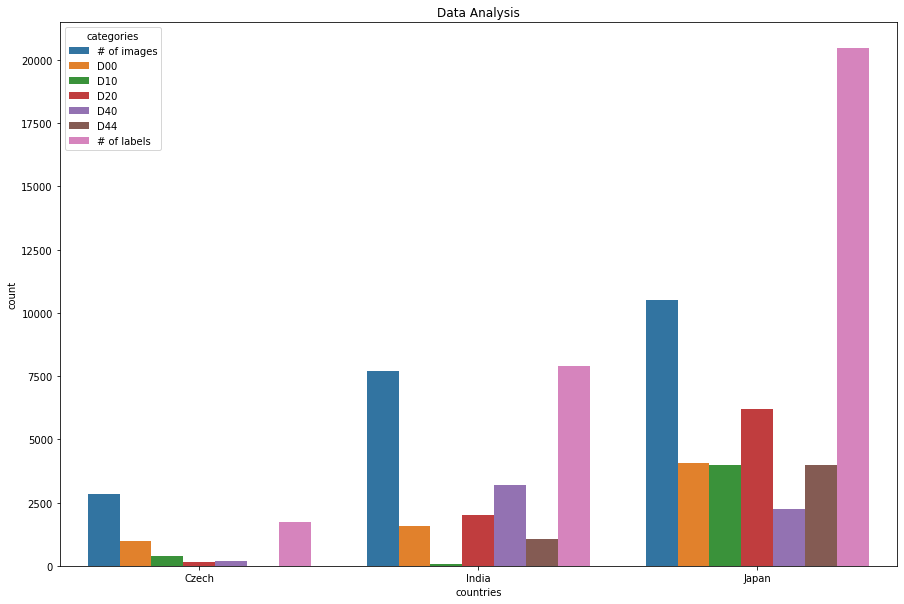

Data analysis of  Czech
    categories  count
0  # of images   2829
1          D00    988
2          D10    399
3          D20    161
4          D40    197
5          D44      0
6  # of labels   1745
****************************************************************************************************
Data analysis of  India
     categories  count
7   # of images   7706
8           D00   1555
9           D10     68
10          D20   2021
11          D40   3187
12          D44   1062
13  # of labels   7893
****************************************************************************************************
Data analysis of  Japan
     categories  count
14  # of images  10506
15          D00   4049
16          D10   3979
17          D20   6199
18          D40   2243
19          D44   3995
20  # of labels  20465
****************************************************************************************************


In [14]:
data_analysis = pd.DataFrame({'countries':cont, 'count': count, 'categories':category})

fig = plt.figure(figsize = (15,10))

sns.barplot(x = 'countries', y = 'count', hue = 'categories', data = data_analysis)
plt.title('Data Analysis')
plt.show()

for i in countries:
    print('Data analysis of ',i)
    print(data_analysis[['categories', 'count']][data_analysis['countries'] == i])
    print('*'*100)

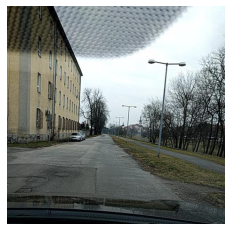

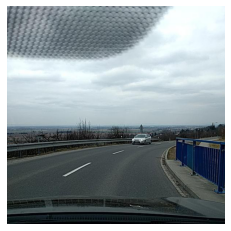

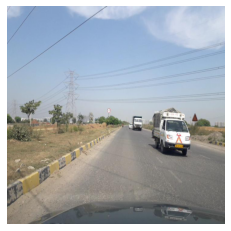

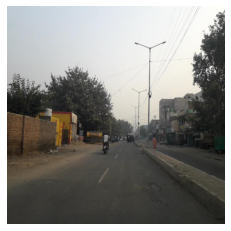

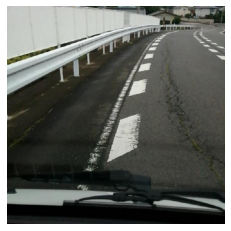

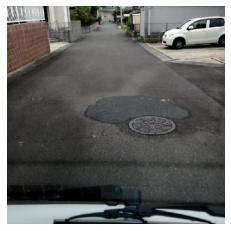

In [15]:
%matplotlib inline

import matplotlib.image as mpimg

pic_index = 2

next_Czech = [os.path.join(Czech, fname) 
                for fname in Czech_images[pic_index-2:pic_index]]
next_India = [os.path.join(India, fname) 
                for fname in India_images[pic_index-2:pic_index]]
next_Japan = [os.path.join(Japan, fname) 
                for fname in Japan_images[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Czech+next_India+next_Japan):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [16]:
def draw_images(image_file, country):

    img = cv2.imread(base_path + country + '/images/' + image_file + '.jpg')
    
    infile_xml = open(base_path + country + '/annotations/xmls/' +image_file + '.xml')
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

In [17]:
files = [['Czech_000021','Czech_000010','Czech_000020','Czech_000031'],['India_000005','India_000011','India_000014','India_000038'],
         ['Japan_000000', 'Japan_000003', 'Japan_000006', 'Japan_000011']]

for i in range(3):
    print('Images of Road Damages of ',countries[i])            
    for j in range(len(files[i])):
        fig = plt.figure(figsize = (6,6))
        img = draw_images(files[i][j], countries[i])
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    print('*'*100)

Output hidden; open in https://colab.research.google.com to view.